In [1]:
# Import standard libraries
import os
import sys
import itertools

In [2]:
# Import libraries to manage arrays, plotting, and Flash-X datasets
import numpy
import matplotlib.pyplot as pyplot
import boxkit
from boxkit.library import Server as BoxServer

In [3]:
PROJECT_HOME="/home/akash/Desktop/Akash/Workbench/Flash-X-Simulations/simulation/EvaporatingBubble/OutflowTest"

In [4]:
sedona = BoxServer(hostname="c361652l.cels.anl.gov", username="akash")
sedona.connect()
datasetLoc = {
    r"Reference" : PROJECT_HOME + os.sep + "reference/jobnode.archive/ref_0.016",
    r"$l_b = 0.5$" : PROJECT_HOME + os.sep + "outflow/buffer_0.5/jobnode.archive/ref_0.016",
    r"$l_b = 1.0$" : PROJECT_HOME + os.sep + "outflow/buffer_1.0/jobnode.archive/ref_0.016",
    r"$l_b = 1.5$" : PROJECT_HOME + os.sep + "outflow/buffer_1.5/jobnode.archive/ref_0.016"
}

fileNumList = [1,2,3,4,5,6]

datasetList = []
for fileNum in fileNumList:
    datasetDict = {}
    for dsetKey in datasetLoc.keys():
        dataset = boxkit.read_dataset(datasetLoc[dsetKey] 
                                      + os.sep 
                                      + "INS_Evaporating_Bubble_hdf5_plt_cnt_"
                                      + str(fileNum).zfill(4), source="flash", server=sedona)
        datasetDict[dsetKey] = boxkit.mergeblocks(dataset, ["dfun"])
    datasetList.append(datasetDict)
sedona.close()

[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remot

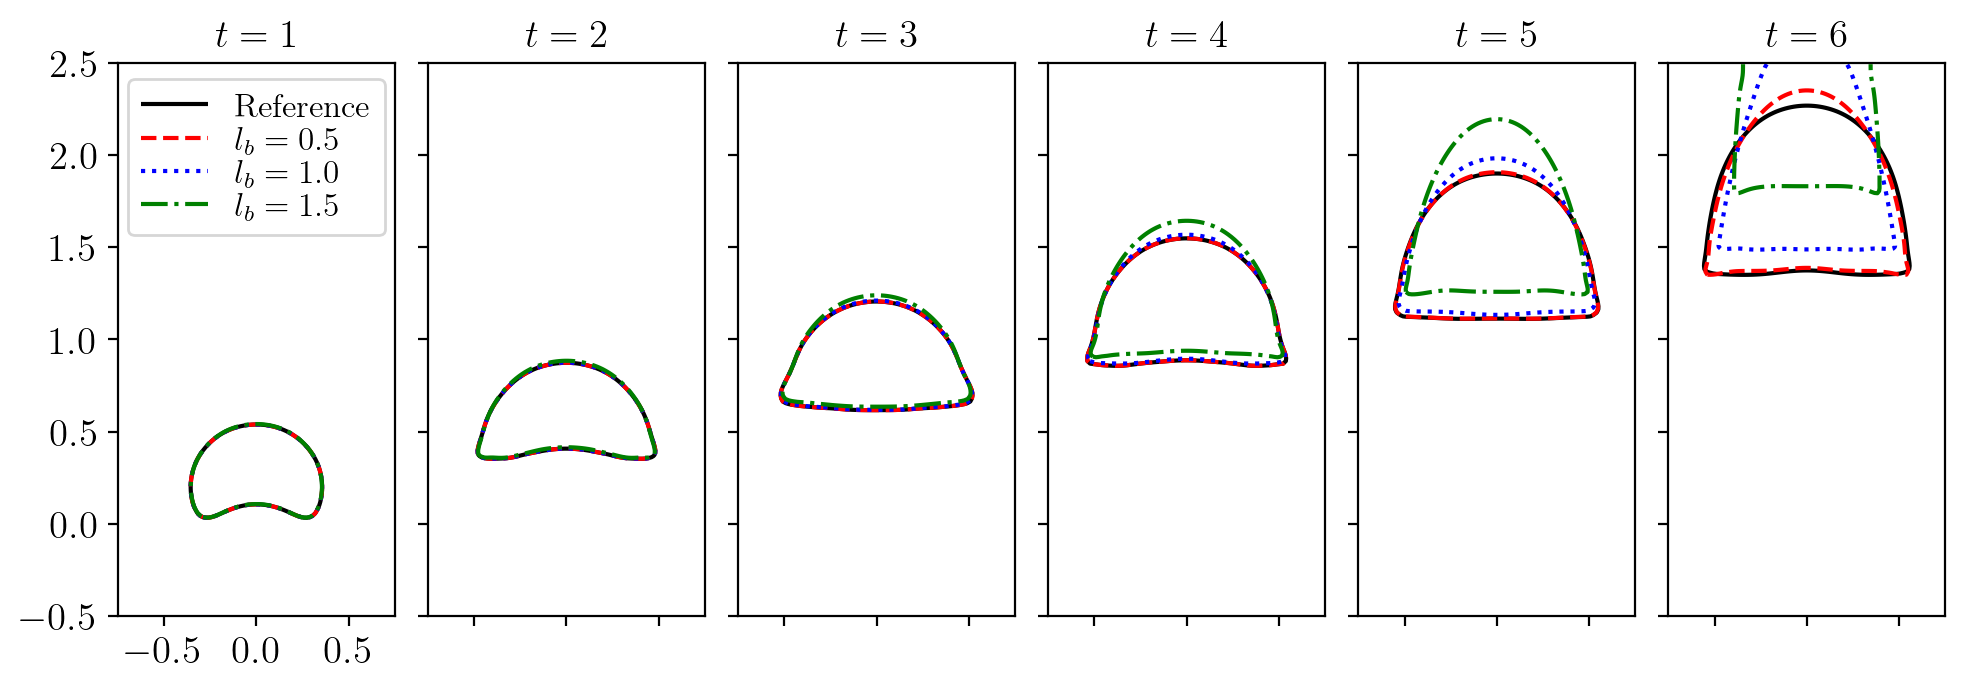

In [5]:
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

figure, subplotList = pyplot.subplots(1,len(fileNumList),sharey="row", figsize=(10,4), dpi=200)

for subplot, datasetDict, fileNum in zip(subplotList, datasetList, fileNumList):
    linestyle = itertools.cycle(("-", "--", ":", "-."))
    colors = itertools.cycle(("black","red","blue","green"))
    
    if subplot == subplotList[0]:
        legendHandle = []
        legendName = []

    for dsetKey in datasetDict.keys():
        for block in datasetDict[dsetKey].blocklist:
            xmesh, ymesh = numpy.meshgrid(block.xrange("center"),block.yrange("center"))
            contour = subplot.contour(xmesh, ymesh, block["dfun"][0,:,:], 
                                      levels=[0], 
                                      linestyles=next(linestyle), colors=next(colors))
        
            if subplot == subplotList[0]:
                h,l = contour.legend_elements()
                legendHandle.append(h[0])
                legendName.append(dsetKey)
    
    subplot.set_title(rf"$t={fileNum}$", fontsize=14)
    
    if subplot != subplotList[0]:
        subplot.xaxis.set_tick_params(labelbottom=False)
        #subplot.xaxis.set_major_locator(pyplot.NullLocator())
        #subplot.yaxis.set_major_locator(pyplot.NullLocator())
        
    subplot.set_xlim([-0.75,0.75])
    subplot.set_ylim([-0.5,2.5])
    subplot.set_aspect('equal')
    
subplotList[0].legend(legendHandle, legendName, loc ="upper center", prop={"weight":"bold", "size":12}, labelspacing=0.1)
#subplotList[0].set_ylabel(r"$x_2$", labelpad=-1)
#subplotList[0].set_xlabel(r"$x_1$", labelpad=-1)
pyplot.subplots_adjust(wspace=-0.25, hspace=0)
pyplot.tight_layout()

pyplot.savefig("/Users/Akash/Desktop/rising_ref2.png")